In [ ]:
# Load the base AnnData

import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad("../data/processed/SKCM_GSE134388_aPD1_adata_base.h5ad")
print(adata)


AnnData object with n_obs × n_vars = 3632 × 14705
    obs: 'UMAP_1', 'UMAP_2', 'Cluster', 'Celltype (malignancy)', 'Celltype (major-lineage)', 'Celltype (minor-lineage)', 'Patient', 'Sample', 'Tissue'


In [5]:
adata.X            # expression matrix (cells × genes)


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3980884 stored elements and shape (3632, 14705)>

In [7]:
adata.obs.head(20)   # cell metadata


,UMAP_1,UMAP_2,Cluster,Celltype (malignancy),Celltype (major-lineage),Celltype (minor-lineage),Patient,Sample,Tissue
Cell,,,,,,,,,
AAACCTGGTCTTCAAG-1,-10.254513,1.006779,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAACCTGGTGGCAAAC-1,-10.756054,-0.125710,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAACGGGCACATGACT-1,-10.355986,1.713204,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAACGGGCAGATCGGA-1,-10.926039,1.805853,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAAGATGCAAGTCTGT-1,-11.483577,1.362478,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAAGATGGTTGTGGAG-1,-10.203296,-0.900082,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAAGCAAGTGTCGCTG-1,-8.336107,2.600748,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAAGCAATCTTGCCGT-1,-10.715004,0.551735,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor
AAAGTAGGTTTAGGAA-1,-11.315102,1.688204,0,Immune cells,CD8T,CD8Tcm,P1,SKCM_PT1,Tumor


In [8]:
adata.var.head()   # gene metadata

,mt
gene,
FO538757.2,False
AP006222.2,False
RP11-206L10.9,False
LINC00115,False
FAM41C,False


In [ ]:
# Identify mitochondrial genes
adata.var["mt"].value_counts()




mt
False    14692
True        13
Name: count, dtype: int64

In [14]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"],
    percent_top=None,
    log1p=False,
    inplace=True
)

# Print AnnData summary (global sanity check)
print(adata)

# Print what is available in .obs (cell metadata)
print("obs columns:")
print(list(adata.obs.columns))

print("\nExample rows:")
adata.obs.head()



# Print what is available in .var (gene metadata)
print("var columns:")
print(list(adata.var.columns))

print("\nMitochondrial gene counts:")
print(adata.var["mt"].value_counts())




AnnData object with n_obs × n_vars = 3632 × 14705
    obs: 'UMAP_1', 'UMAP_2', 'Cluster', 'Celltype (malignancy)', 'Celltype (major-lineage)', 'Celltype (minor-lineage)', 'Patient', 'Sample', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
obs columns:
['UMAP_1', 'UMAP_2', 'Cluster', 'Celltype (malignancy)', 'Celltype (major-lineage)', 'Celltype (minor-lineage)', 'Patient', 'Sample', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt']

Example rows:
var columns:
['mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts']

Mitochondrial gene counts:
mt
False    14692
True        13
Name: count, dtype: int64


In [ ]:
# Explicit QC metric inspection
print("\nQC metric ranges:")
print("n_genes_by_counts:")
print(adata.obs["n_genes_by_counts"].describe())

print("\ntotal_counts:")
print(adata.obs["total_counts"].describe())

print("\npct_counts_mt:")
print(adata.obs["pct_counts_mt"].describe())



QC metric ranges:
n_genes_by_counts:
count    3632.000000
mean     1096.058370
std       533.034843
min       499.000000
25%       680.000000
50%       929.500000
75%      1369.250000
max      4420.000000
Name: n_genes_by_counts, dtype: float64

total_counts:
count    3632.000000
mean     1987.706787
std       448.037140
min       757.283936
25%      1609.847992
50%      1930.823792
75%      2326.725525
max      3496.391846
Name: total_counts, dtype: float64

pct_counts_mt:
count    3632.000000
mean        1.975724
std         0.555794
min         0.000000
25%         1.578019
50%         1.911964
75%         2.321077
max         4.460252
Name: pct_counts_mt, dtype: float64


In [16]:
# how many cells would fail common QC thresholds

print("\nCells with low gene counts (<200):",
      (adata.obs["n_genes_by_counts"] < 200).sum())

print("Cells with high mitochondrial content (>10%):",
      (adata.obs["pct_counts_mt"] > 10).sum())



Cells with low gene counts (<200): 0
Cells with high mitochondrial content (>10%): 0


In [ ]:
# Check for bad cells
adata.obs.loc[
    adata.obs["pct_counts_mt"] > 10,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"]
].head()


,n_genes_by_counts,total_counts,pct_counts_mt
Cell,,,


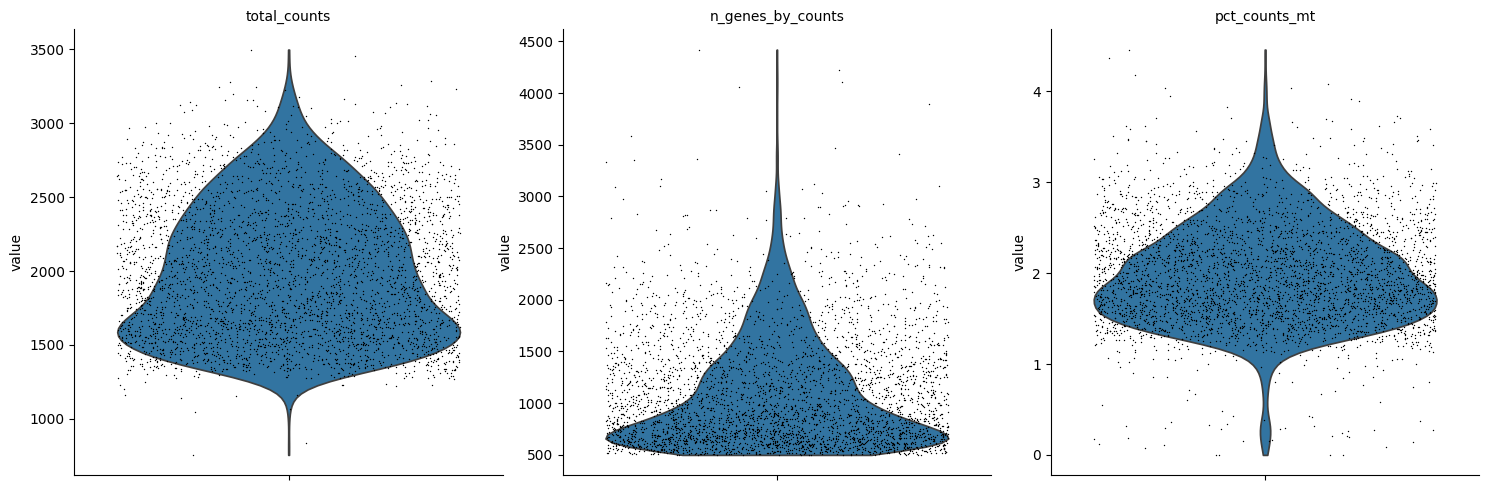

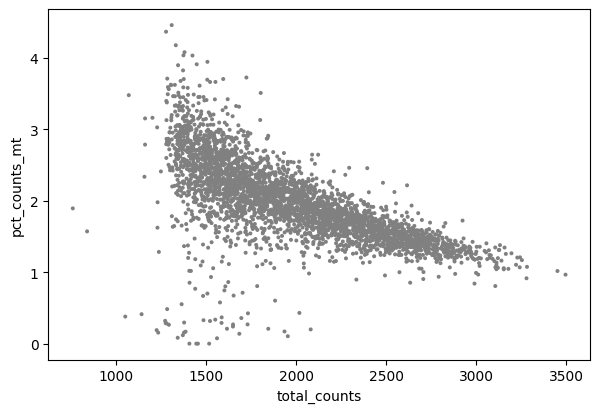

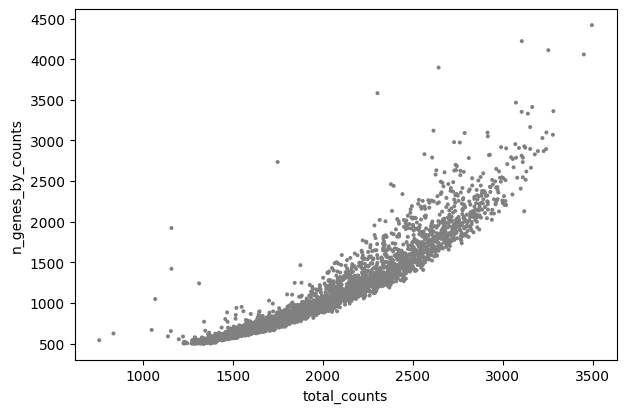

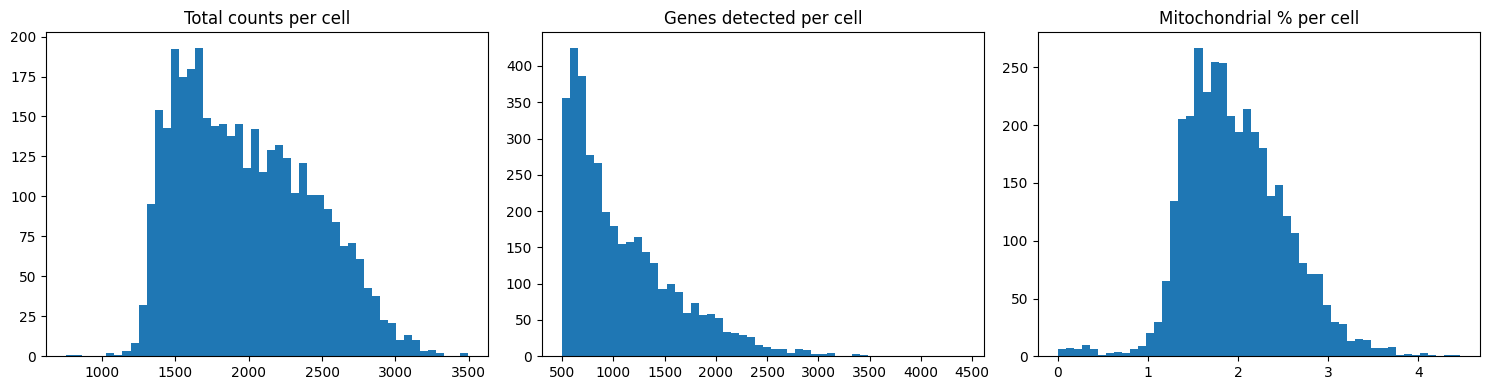

In [23]:
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

PLOT_DIR = Path("../results/qc")
PLOT_DIR.mkdir(parents=True, exist_ok=True)

# 1) Violin plots (most common QC view)
sc.pl.violin(
    adata,
    keys=["total_counts", "n_genes_by_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

## Save Violin Plot 
sc.pl.violin(
    adata,
    keys=["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    show=False
)

plt.savefig(PLOT_DIR / "qc_violin_metrics.png", dpi=300, bbox_inches="tight")
plt.close()


# 2) Scatter: total_counts vs pct_mt
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")


# 3) Scatter: total_counts vs n_genes
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")


## Save Scatter Plot
sc.pl.scatter(
    adata,
    x="total_counts",
    y="n_genes_by_counts",
    save=False,
    show=False
)

plt.savefig(PLOT_DIR / "qc_total_counts_vs_genes.png", dpi=300, bbox_inches="tight")
plt.close()

sc.pl.scatter(
    adata,
    x="total_counts",
    y="pct_counts_mt",
    save=False,
    show=False
)

plt.savefig(PLOT_DIR / "qc_total_counts_vs_pct_counts_mt.png", dpi=300, bbox_inches="tight")
plt.close()


# 4) Histograms (quick distribution view)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(adata.obs["total_counts"], bins=50)
axes[0].set_title("Total counts per cell")

axes[1].hist(adata.obs["n_genes_by_counts"], bins=50)
axes[1].set_title("Genes detected per cell")

axes[2].hist(adata.obs["pct_counts_mt"], bins=50)
axes[2].set_title("Mitochondrial % per cell")

plt.tight_layout()
plt.show()

## Save Histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(adata.obs["total_counts"], bins=50)
axes[0].set_title("Total counts per cell")

axes[1].hist(adata.obs["n_genes_by_counts"], bins=50)
axes[1].set_title("Genes detected per cell")

axes[2].hist(adata.obs["pct_counts_mt"], bins=50)
axes[2].set_title("Mitochondrial %")

plt.tight_layout()
plt.savefig(PLOT_DIR / "qc_distributions.png", dpi=300)
plt.close()

